# Objective

The objective of this notebook is to explore the CMS (Medicare and Medicaid) dataset. At this moment, there is no specific interest in any particular question.

**Necessary Imports**

In [1]:
## import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


'''
Settings for dpi, color palette, and background
for seaborn
'''
palette = [
    
    "#667307",  
    "#BF571B",  
    "#C1D911",  
    "#F2B84B",  
    "#ABBF0F",  
    "#5679BF", "#5679BF", "#5679BF"  
]


sns.set_style('whitegrid')
sns.set_palette("coolwarm")
plt.rcParams['figure.figsize'] = 12, 4
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.size'] = 10 

## Configuration to display all columns of the dataframe
pd.set_option('display.max_columns', None)

path = '/kaggle/input/medicare-and-medicaid/CMS.csv' ## file path
cms_data = pd.read_csv(path)

**Searching for inconsistencies**

In [2]:
cms_data.sample(5)

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
17306,NaN,2020,AR,Arizona,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of in-hospital mortality among coro...,Crude,Percent (%),6.3,6.3,NaN,NaN,5.2,7.7,Gender,Female,C1,T4,MD303,Crude,BOC02,GEN02,4,POINT (-111.7638113 34.86597028)
28429,NaN,2017,NV,Nevada,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Cerebrovascular disease (stroke) hospitalizati...,Crude,"Rate per 100,000",935.2,935.2,NaN,NaN,878.0,996.0,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,32,POINT (-117.0718406 39.49324039)
17659,NaN,2018,MA,Massachusetts,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Acute myocardial infarction (heart attack) hos...,Crude,"Rate per 100,000",862.9,862.9,NaN,NaN,664.0,1121.2,Race,Hispanic,C1,T3,MD401,Crude,BOC04,RAC04,25,POINT (-72.08269067 42.27687047)
20935,NaN,2021,AL,Alabama,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Acute Myocardial Infarction (Heart Attack),Acute myocardial infarction (heart attack) hos...,Crude,"Rate per 100,000",494.2,494.2,NaN,NaN,311.4,784.4,Race,Unknown,C1,T3,MD401,Crude,BOC04,RAC08,1,POINT (-86.63186076 32.84057112)
11221,NaN,2020,PA,Pennsylvania,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2949.0,2949.0,NaN,NaN,2648.3,3283.9,Race,Non-Hispanic Asian,C1,T1,MD101,Crude,BOC04,RAC03,42,POINT (-77.86070029 40.79373015)


**missing Values**

In [3]:
'''
This function takes the dataframe as input and returns another 
dataframe where the total percentage of missing values is shown 
for each column along with their respective data types.
'''

def display_missing_data(data):
    total = data.isnull().sum()
    percent = np.round(total / len(data) * 100, 2)
    df_null = pd.concat([total, percent], axis=1, keys=['Qtd. Nulos', 'Percent'])
    types = []
    
    for col in data.columns:
        dtypes = str(data[col].dtype)
        types.append(dtypes)
    
    df_null['Types'] = types
    return ((np.round(df_null.T, 2)).transpose())


## uso da função
display_missing_data(cms_data)

,Qtd. Nulos,Percent,Types
RowId,33454,100.0,float64
YearStart,0,0.0,int64
LocationAbbr,0,0.0,object
LocationDesc,0,0.0,object
DataSource,0,0.0,object
PriorityArea1,33454,100.0,float64
PriorityArea2,33454,100.0,float64
PriorityArea3,33454,100.0,float64
PriorityArea4,33454,100.0,float64
Class,0,0.0,object


> There are excessive null values to the point where it is not plausible to recover the values. In some cases, it is 100%.

In [4]:
## Delete columns containing null values
cms_data = (cms_data.dropna(axis=1))

> In the process, we lost the '**GeoLocation**' column. We can evaluate the possibility of treating the data in order to extract **longitude** and **latitude**.

In [5]:
'''
This function creates a dataframe based on the received dataframe. 
It returns another dataframe containing the following information:

- Most frequent values
- Number of values (size of items in the column)
- Percentage of frequency of the most common item
'''
def most_frequent_values(data):
    total = data.count()
    df_mfq = pd.DataFrame(total)
    df_mfq.columns = ['Total']
    
    items = []
    vals = []
    
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            
            items.append(itm)
            vals.append(val)
            
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue

    # Moving this block outside the loop
    df_mfq['Most frequent item'] = items
    df_mfq['Frequence'] = vals
    df_mfq['Percent from total'] = np.round(vals / total * 100, 3)
    
    return df_mfq

## how to use the function
most_frequent_values(cms_data)

,Total,Most frequent item,Frequence,Percent from total
YearStart,33454,2016,5609,16.766
LocationAbbr,33454,AR,1281,3.829
LocationDesc,33454,United States,720,2.152
DataSource,33454,Medicare,33454,100.000
Class,33454,Cardiovascular Diseases,33454,100.000
Topic,33454,Major Cardiovascular Disease,5626,16.817
Question,33454,Major cardiovascular disease hospitalization r...,2814,8.412
Data_Value_Type,33454,Crude,33454,100.000
Data_Value_Unit,33454,"Rate per 100,000",16884,50.469
Data_Value,33454,0.0,2833,8.468


In [6]:
'''
This function creates a dataframe based on the received dataframe to display the data 
types for each column and how many unique values each column has.
'''

def display_unique_values(data):
    unique_values = data.nunique()
    df_unique = pd.DataFrame({'Unique Values': unique_values})
    
    types = []
    for col in data.columns:
        dtypes = str(data[col].dtype)
        types.append(dtypes)
    
    df_unique['Types'] = types
    return df_unique

## How to use the function
display_unique_values(cms_data)

,Unique Values,Types
YearStart,6,int64
LocationAbbr,51,object
LocationDesc,52,object
DataSource,1,object
Class,1,object
Topic,6,object
Question,12,object
Data_Value_Type,1,object
Data_Value_Unit,2,object
Data_Value,12699,float64


**visualize**

> In this step, we will quickly look especially at the categorical columns, using simple plots. For example, for now, let's exclude the need to see the "Questions" column as it requires something more sophisticated and intricate.

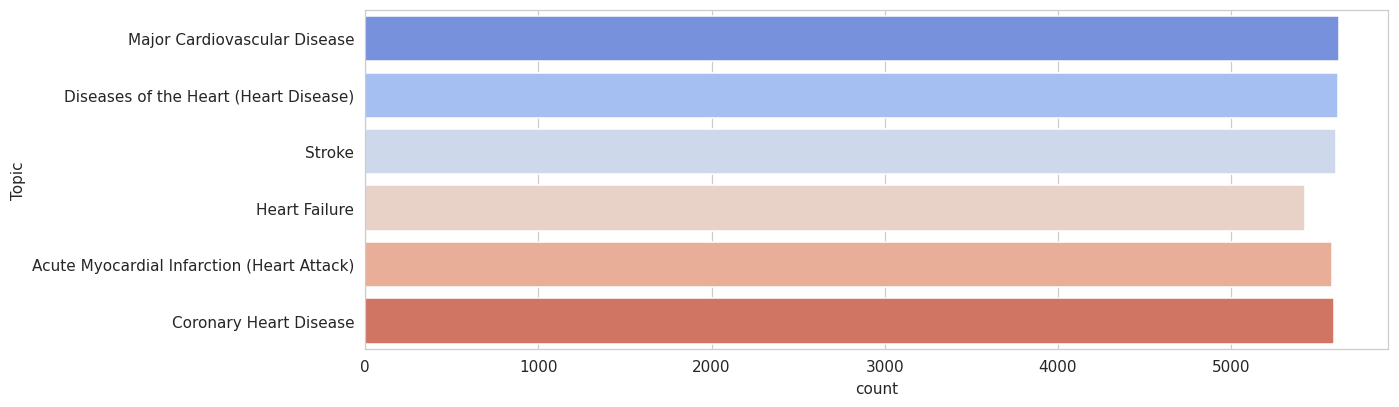

In [7]:
sns.countplot(data=cms_data, y='Topic');

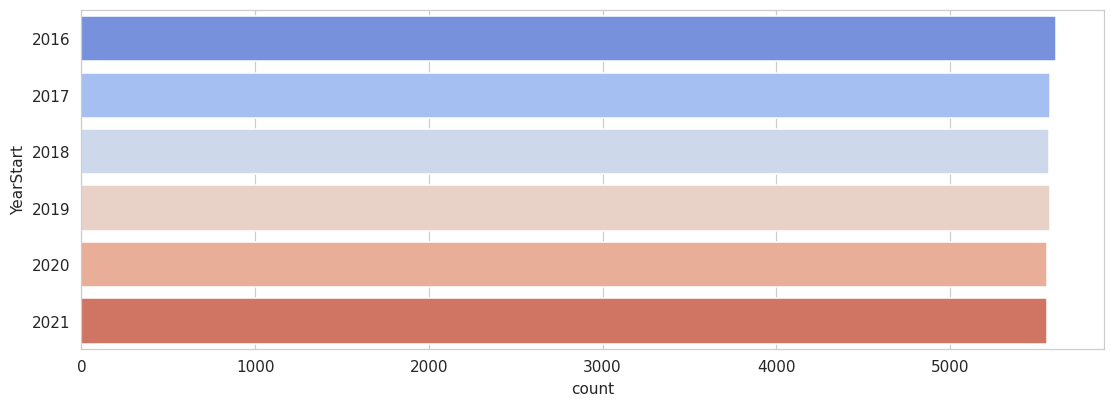

In [8]:
sns.countplot(data=cms_data, y='YearStart');

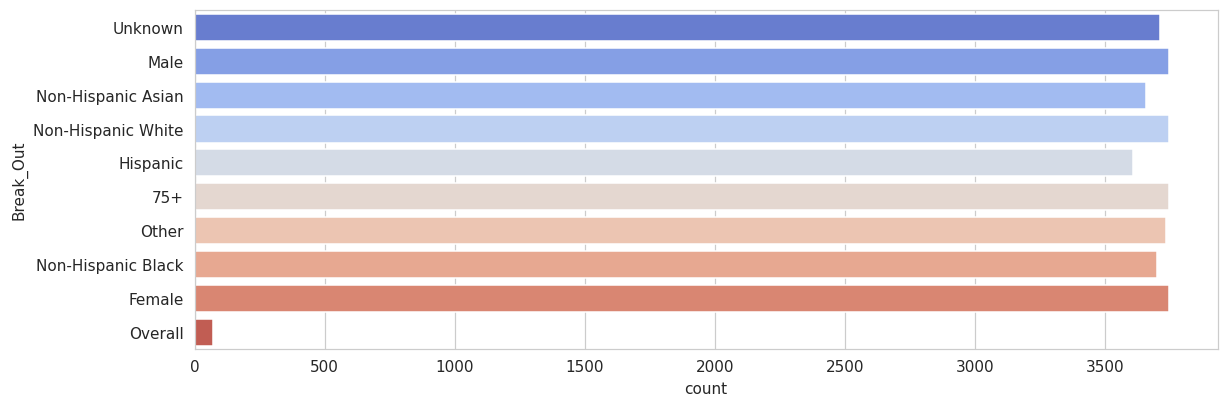

In [9]:
sns.countplot(data=cms_data, y='Break_Out', palette='coolwarm');

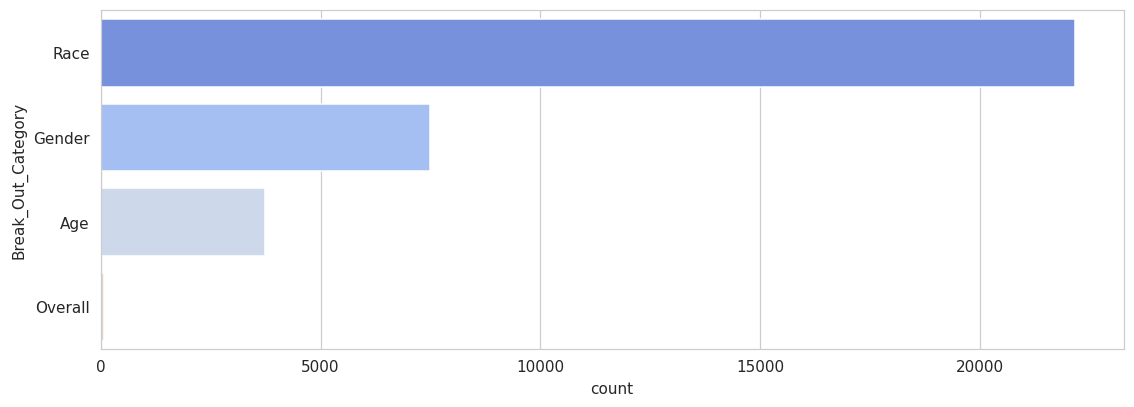

In [10]:
sns.countplot(data=cms_data, y='Break_Out_Category');